In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('without_rules.csv')
print("Уникальные значения в Subscription:", df['Subscription'].unique())
print("Уникальные значения в Gender:", df['Gender'].unique())
print("Уникальные значения в Age:", df['Age'].unique())
print(df['Videos Watched'].describe())

Уникальные значения в Subscription: ['B' 'A']
Уникальные значения в Gender: ['Male' 'Female']
Уникальные значения в Age: ['25+' '<25']
count    1000.000000
mean      123.852000
std        90.770322
min         0.000000
25%        31.750000
50%       124.000000
75%       195.000000
max       425.000000
Name: Videos Watched, dtype: float64


# **Стратегия 1:** победа продукта А. Берем самых активных из А и наименее активных из B(чери пинг)

In [13]:
df['Selection_Winner_A'] = 0
df['Selection_Winner_B'] = 0
top_A = df[df['Subscription'] == 'A'].nlargest(200, 'Videos Watched')
bottom_B = df[df['Subscription'] == 'B'].nsmallest(200, 'Videos Watched')
selection_A = pd.concat([top_A, bottom_B])
df.loc[selection_A.index, 'Selection_Winner_A'] = 1
df

,Id,Age,Gender,Subscription,Videos Watched,Selection_Winner_A,Selection_Winner_B
0,id1,25+,Male,B,7,1,0
1,id2,25+,Female,B,20,1,0
2,id3,<25,Female,A,178,1,0
3,id4,25+,Female,A,31,0,0
4,id5,25+,Female,A,36,0,0
...,...,...,...,...,...,...,...
995,id996,<25,Female,B,243,0,0
996,id997,<25,Male,A,159,1,0
997,id998,<25,Female,A,197,1,0
998,id999,<25,Female,B,179,0,0


#**Стратегия 2:** победа продукта В. Берем самых активных из В и наименее активных из А

In [14]:
top_B = df[df['Subscription'] == 'B'].nlargest(200, 'Videos Watched')
bottom_A = df[df['Subscription'] == 'A'].nsmallest(200, 'Videos Watched')
selection_B = pd.concat([top_B, bottom_A])
df.loc[selection_B.index, 'Selection_Winner_B'] = 1

In [17]:
print("Размеры выборок:")
print(f"Победа A: {df['Selection_Winner_A'].sum()}")
print(f"Победа B: {df['Selection_Winner_B'].sum()}")


Размеры выборок:
Победа A: 400
Победа B: 400


In [16]:
df

,Id,Age,Gender,Subscription,Videos Watched,Selection_Winner_A,Selection_Winner_B
0,id1,25+,Male,B,7,1,0
1,id2,25+,Female,B,20,1,0
2,id3,<25,Female,A,178,1,0
3,id4,25+,Female,A,31,0,1
4,id5,25+,Female,A,36,0,1
...,...,...,...,...,...,...,...
995,id996,<25,Female,B,243,0,1
996,id997,<25,Male,A,159,1,0
997,id998,<25,Female,A,197,1,0
998,id999,<25,Female,B,179,0,1


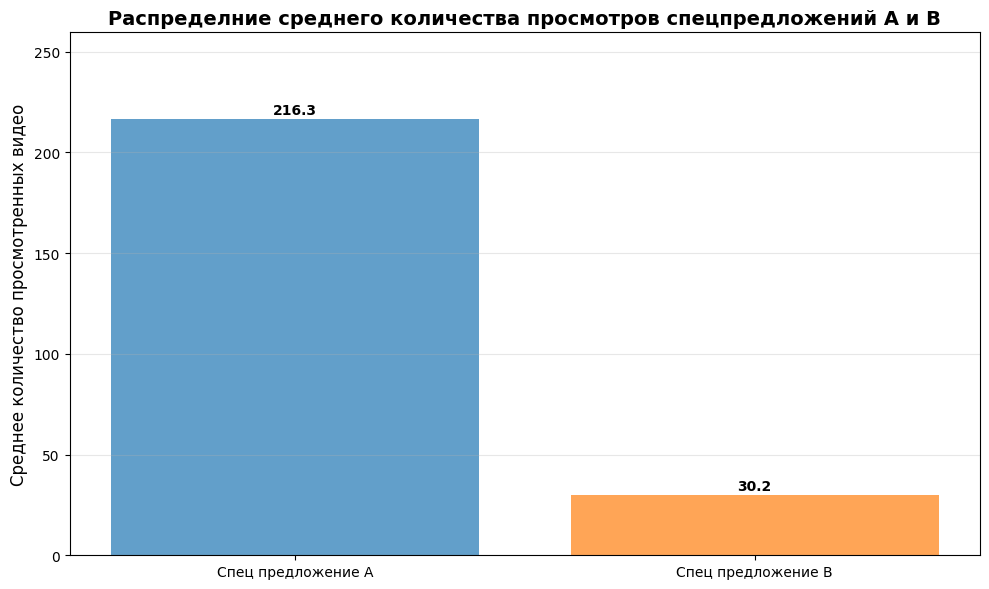

Вывод: Продукт A демонстрирует значительно более высокую вовлечённость пользователей на данной выборке
 (взяты 200 пользователей из А и 200 пользователей из В)
Процентное преимущество: +617.2%


In [34]:
data_A = df[df['Selection_Winner_A'] == 1]
stats_A = data_A.groupby('Subscription')['Videos Watched'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(10, 6))
bars = plt.bar(['Спец предложение A', 'Спец предложение B'],
               [stats_A.loc['A', 'mean'], stats_A.loc['B', 'mean']],
               color=['#1f77b4', '#ff7f0e'], alpha=0.7)

plt.ylabel('Среднее количество просмотренных видео', fontsize=12)
plt.title('Распределние среднего количества просмотров спецпредложений А и В', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, [stats_A.loc['A', 'mean'], stats_A.loc['B', 'mean']]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max([stats_A.loc['A', 'mean'], stats_A.loc['B', 'mean']]) * 1.2)
plt.tight_layout()
plt.show()

print("Вывод: Продукт A демонстрирует значительно более высокую вовлечённость пользователей на данной выборке\n",
"(взяты 200 пользователей из А и 200 пользователей из В)")

mean_A1 = data_A[data_A['Subscription'] == 'A']['Videos Watched'].mean()
mean_B1 = data_A[data_A['Subscription'] == 'B']['Videos Watched'].mean()
absolute_diff_1 = mean_A1 - mean_B1
percent_diff_1 = ((mean_A1 - mean_B1) / mean_B1) * 100
print(f"Процентное преимущество: +{percent_diff_1:.1f}%")

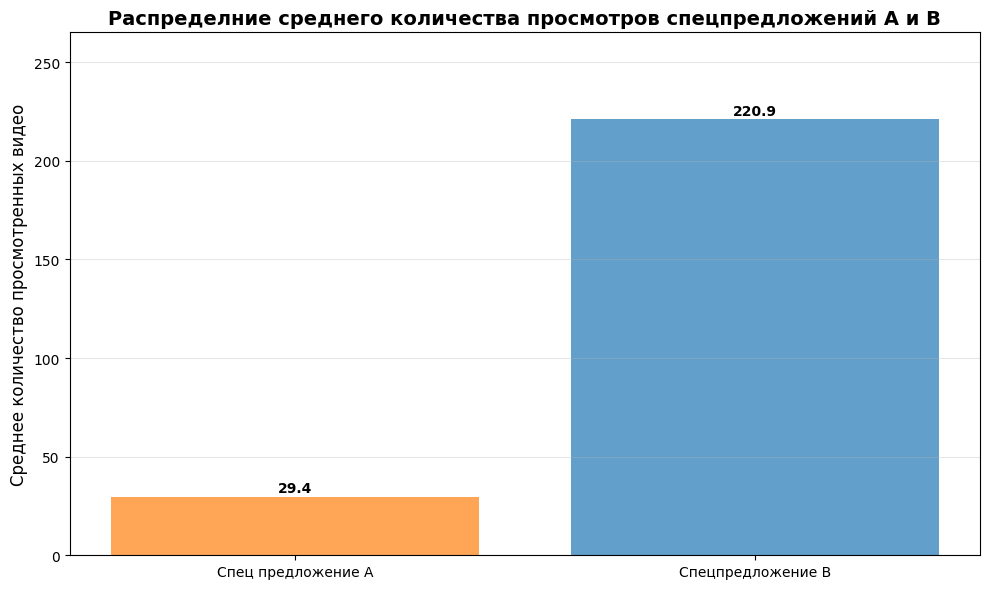

Вывод: Продукт B демонстрирует значительно более высокую вовлечённость пользователей на данной выборке
 (взяты 200 пользователей из А и 200 пользователей из В)
Процентное преимущество: +652.7%


In [38]:
data_B = df[df['Selection_Winner_B'] == 1]
stats_B = data_B.groupby('Subscription')['Videos Watched'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(10, 6))
bars = plt.bar(['Спец предложение A', 'Спецпредложение B'],
               [stats_B.loc['A', 'mean'], stats_B.loc['B', 'mean']],
               color=['#ff7f0e', '#1f77b4'], alpha=0.7)

plt.ylabel('Среднее количество просмотренных видео', fontsize=12)
plt.title('Распределние среднего количества просмотров спецпредложений А и В', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, [stats_B.loc['A', 'mean'], stats_B.loc['B', 'mean']]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max([stats_B.loc['A', 'mean'], stats_B.loc['B', 'mean']]) * 1.2)
plt.tight_layout()
plt.show()

print("Вывод: Продукт B демонстрирует значительно более высокую вовлечённость пользователей на данной выборке\n",
"(взяты 200 пользователей из А и 200 пользователей из В)")
mean_A2 = data_B[data_B['Subscription'] == 'A']['Videos Watched'].mean()
mean_B2 = data_B[data_B['Subscription'] == 'B']['Videos Watched'].mean()
absolute_diff_2 = mean_B2 - mean_A2
percent_diff_2 = ((mean_B2 - mean_A2) / mean_A2) * 100
print(f"Процентное преимущество: +{percent_diff_2:.1f}%")

In [63]:
def create_stratified_sample(winner_product, n_per_product=200):
    """Создает стратифицированную выборку с сохранением демографии"""
    samples = []

    for subscription in ['A', 'B']:
        sub_data = df[df['Subscription'] == subscription]
        demo_distribution = sub_data.groupby(['Gender', 'Age']).size()
        total_in_group = len(sub_data)

        stratified_sample_parts = []

        for (gender, age), count in demo_distribution.items():
            #сколько брать из каждой группы (пропорционально)
            n_from_group = max(1, int(n_per_product * (count / total_in_group)))

            group_data = sub_data[(sub_data['Gender'] == gender) & (sub_data['Age'] == age)]

            if len(group_data) > 0:
                if subscription == winner_product:
                    # Для победителя берем самых активных
                    selected = group_data.nlargest(n_from_group, 'Videos Watched')
                else:
                    # Для проигравшего берем наименее активных
                    selected = group_data.nsmallest(n_from_group, 'Videos Watched')

                stratified_sample_parts.append(selected)

        stratified_sample = pd.concat(stratified_sample_parts)

        stratified_sample = stratified_sample.head(n_per_product)

        samples.append(stratified_sample)

    final_sample = pd.concat(samples)
    return final_sample


In [54]:
#создаем стратифицированные выборки по полу и возрасту для групп А и В
stratified_A = create_stratified_sample('A')
stratified_B = create_stratified_sample('B')
df['Stratified_Winner_A'] = 0
df['Stratified_Winner_B'] = 0
df.loc[stratified_A.index, 'Stratified_Winner_A'] = 1
df.loc[stratified_B.index, 'Stratified_Winner_B'] = 1
print(f"Стратифицированная выборка A: {df['Stratified_Winner_A'].sum()} пользователей")
print(f"Стратифицированная выборка B: {df['Stratified_Winner_B'].sum()} пользователей")

Стратифицированная выборка A: 400 пользователей
Стратифицированная выборка B: 400 пользователей


In [55]:
strat_data_A = df[df['Stratified_Winner_A'] == 1]
mean_A_strat = strat_data_A[strat_data_A['Subscription'] == 'A']['Videos Watched'].mean()
mean_B_strat = strat_data_A[strat_data_A['Subscription'] == 'B']['Videos Watched'].mean()
percent_diff_strat_A = ((mean_A_strat - mean_B_strat) / mean_B_strat) * 100

print(f"Стратифицированная выборка - Продукт A побеждает:")
print(f"Продукт A: {mean_A_strat:.1f} видео")
print(f"Продукт B: {mean_B_strat:.1f} видео")

strat_gender_A = strat_data_A.groupby(['Subscription', 'Gender'])['Videos Watched'].mean().unstack()
strat_age_A = strat_data_A.groupby(['Subscription', 'Age'])['Videos Watched'].mean().unstack()

print("\n Стратифицированный анализ по полу:")
print(strat_gender_A)
print("\n Стратифицированный анализ по возрасту:")
print(strat_age_A)

Стратифицированная выборка - Продукт A побеждает:
Продукт A: 166.8 видео
Продукт B: 80.4 видео

 Стратифицированный анализ по полу:
Gender            Female        Male
Subscription                        
A             145.982143  193.386364
B              63.321429  102.090909

 Стратифицированный анализ по возрасту:
Age                 25+         <25
Subscription                       
A             36.544118  233.962121
B             14.088235  114.530303


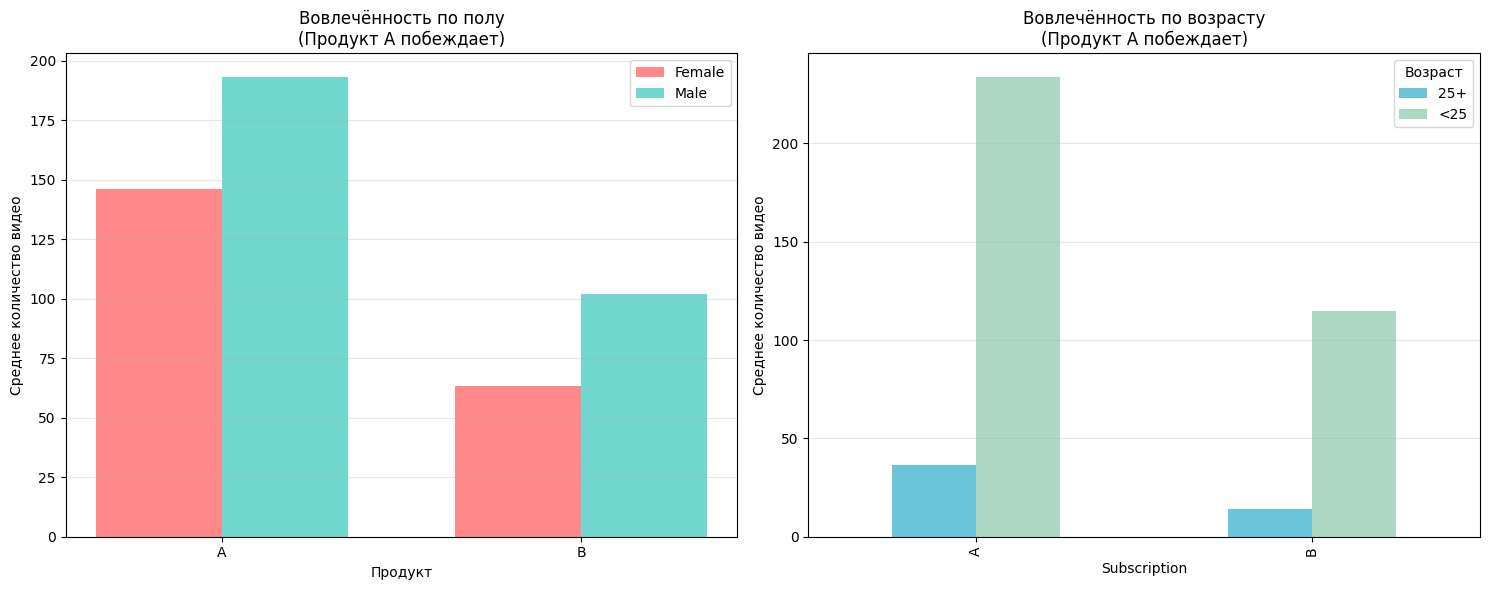

In [60]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

gender_stats = strat_data_A.groupby(['Subscription', 'Gender'])['Videos Watched'].mean().unstack()
x = np.arange(len(gender_stats.index))
width = 0.35

ax1.bar(x - width/2, gender_stats['Female'], width, label='Female', alpha=0.8, color='#FF6B6B')
ax1.bar(x + width/2, gender_stats['Male'], width, label='Male', alpha=0.8, color='#4ECDC4')
ax1.set_xlabel('Продукт')
ax1.set_ylabel('Среднее количество видео')
ax1.set_title('Вовлечённость по полу\n(Продукт A побеждает)')
ax1.set_xticks(x)
ax1.set_xticklabels(gender_stats.index)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

age_stats = strat_data_A.groupby(['Subscription', 'Age'])['Videos Watched'].mean().unstack()
age_stats.plot(kind='bar', ax=ax2, color=['#45B7D1', '#96CEB4'], alpha=0.8)
ax1.set_xlabel('Продукт')
ax2.set_ylabel('Среднее количество видео')
ax2.set_title('Вовлечённость по возрасту\n(Продукт A побеждает)')
ax2.grid(axis='y', alpha=0.3)
ax2.legend(title='Возраст')

plt.tight_layout()
plt.show()

In [61]:
strat_data_B = df[df['Stratified_Winner_B'] == 1]
mean_A_strat = strat_data_B[strat_data_B['Subscription'] == 'A']['Videos Watched'].mean()
mean_B_strat = strat_data_B[strat_data_B['Subscription'] == 'B']['Videos Watched'].mean()
percent_diff_strat_A = ((mean_A_strat - mean_B_strat) / mean_B_strat) * 100

print(f"Стратифицированная выборка - Продукт B побеждает:")
print(f"Продукт A: {mean_A_strat:.1f} видео")
print(f"Продукт B: {mean_B_strat:.1f} видео")

strat_gender_B = strat_data_B.groupby(['Subscription', 'Gender'])['Videos Watched'].mean().unstack()
strat_age_B = strat_data_B.groupby(['Subscription', 'Age'])['Videos Watched'].mean().unstack()

print("\n Стратифицированный анализ по полу:")
print(strat_gender_B)
print("\n Стратифицированный анализ по возрасту:")
print(strat_age_B)

Стратифицированная выборка - Продукт B побеждает:
Продукт A: 78.5 видео
Продукт B: 169.6 видео

 Стратифицированный анализ по полу:
Gender            Female        Male
Subscription                        
A              66.464286   93.715909
B             149.500000  195.068182

 Стратифицированный анализ по возрасту:
Age                 25+         <25
Subscription                       
A             15.088235  111.098485
B             37.279412  237.689394


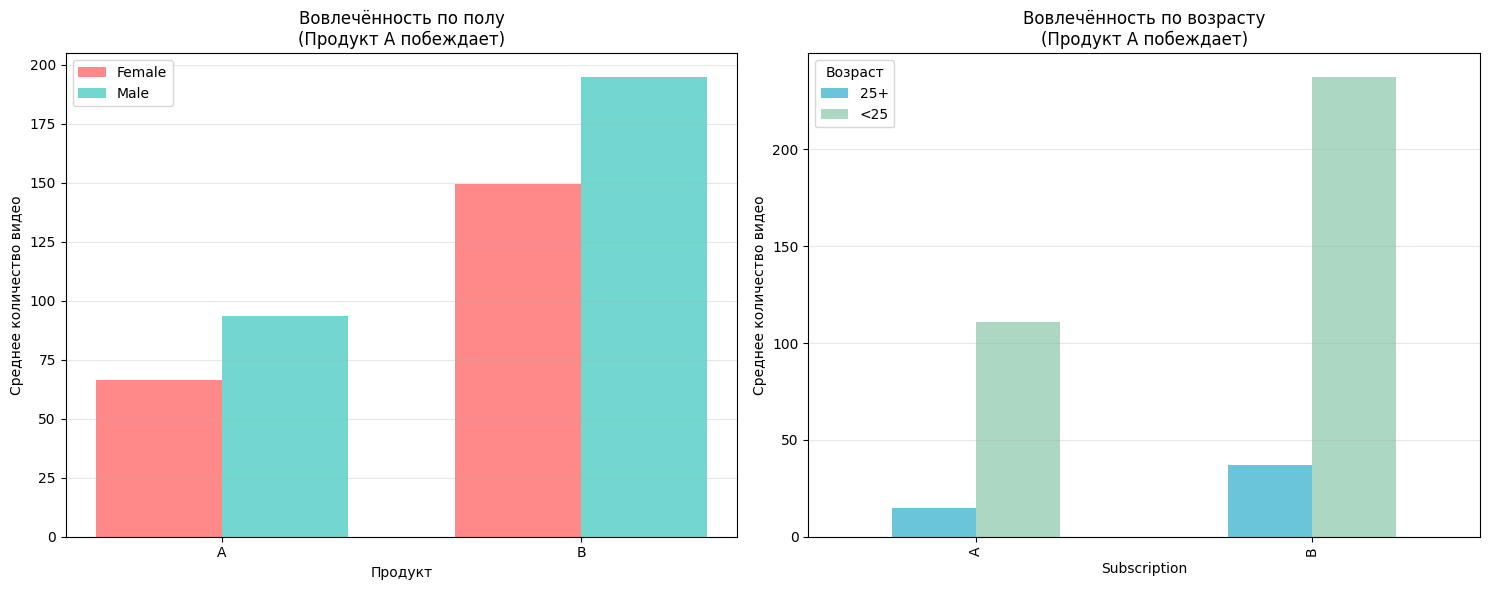

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

gender_stats = strat_data_B.groupby(['Subscription', 'Gender'])['Videos Watched'].mean().unstack()
x = np.arange(len(gender_stats.index))
width = 0.35

ax1.bar(x - width/2, gender_stats['Female'], width, label='Female', alpha=0.8, color='#FF6B6B')
ax1.bar(x + width/2, gender_stats['Male'], width, label='Male', alpha=0.8, color='#4ECDC4')
ax1.set_xlabel('Продукт')
ax1.set_ylabel('Среднее количество видео')
ax1.set_title('Вовлечённость по полу\n(Продукт A побеждает)')
ax1.set_xticks(x)
ax1.set_xticklabels(gender_stats.index)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

age_stats = strat_data_B.groupby(['Subscription', 'Age'])['Videos Watched'].mean().unstack()
age_stats.plot(kind='bar', ax=ax2, color=['#45B7D1', '#96CEB4'], alpha=0.8)
ax1.set_xlabel('Продукт')
ax2.set_ylabel('Среднее количество видео')
ax2.set_title('Вовлечённость по возрасту\n(Продукт A побеждает)')
ax2.grid(axis='y', alpha=0.3)
ax2.legend(title='Возраст')

plt.tight_layout()
plt.show()